# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [142]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from tqdm import tqdm_notebook

In [49]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/mnt/c/users/我的电脑/desktop/springboard/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [50]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/bentrey/myProjectDir/myProjectEnv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


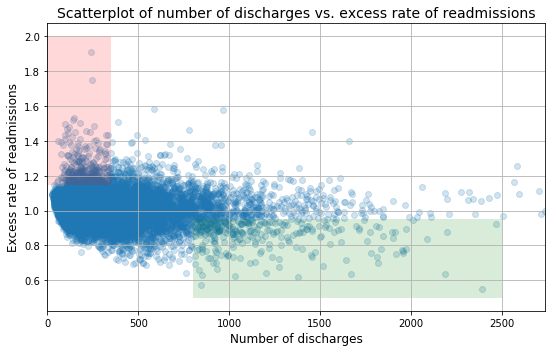

In [51]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [256]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/mnt/c/users/我的电脑/desktop/springboard/hospital_readmit/data/cms_hospital_readmissions.csv')

In [257]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/bentrey/myProjectDir/myProjectEnv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [258]:
data=clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio']<=1.6] 
data=data[data['Number of Discharges']<=3000]
data=data[np.isfinite(data['Excess Readmission Ratio']) & np.isfinite(data['Number of Discharges'])]

<h1>Question A:</h1>
<p>Do you agree with the above analysis and recommendations? Why or why not?<br><br>
I agree with A. B is misleading as the distribution of data widens in the region where the number of discharges is greater than 800 (see graph in response to Question B part 5). I agree an increase in the number of discharges reduces an excess rate or readmission. I disagree larger facilites give a greater quailty of care. In general larger facilites give a greater quaility of care but also reduce quaility control. I disagree with the recommendations. The difference in care is statistically signifigant but small enough that changes in policy would create an forseen change in quaility of care through their own consequences.</p>

<h1>Question B:</h1>
Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

<p><b>1. Setup an appropriate hypthesis test.</b><br><br>
<b>Hypothesis</b><br>
H<sub>0</sub>: The mean does not change between regions<br>
H<sub>a</sub>: The mean where the number of discharges is less than 350 is greater than when the number of discharges is greater than 800.</p>

<p><b>2. Compute and report the observed significance value (or p-value).</b></p>

<p>Getting the data for the red region</p>

In [262]:
red_data=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<350] 
red_data=red_data[np.isfinite(red_data['Excess Readmission Ratio']) & np.isfinite(red_data['Number of Discharges'])]

<p>Graphically analyzing the data in the red region</p>

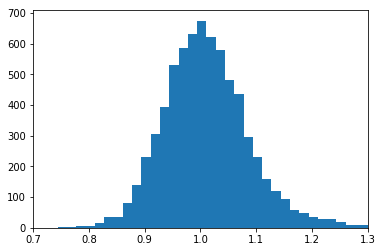

NormaltestResult(statistic=2031.7346967610356, pvalue=0.0)

In [263]:
plt.hist(red_data['Excess Readmission Ratio'],bins=70)
plt.xlim(xmin=0.7, xmax = 1.3)
plt.show()
stats.normaltest(red_data['Excess Readmission Ratio'])

<p>Getting the data for the green region</p>

In [264]:
green_data=clean_hospital_read_df[np.array(clean_hospital_read_df['Number of Discharges']<2500) &\
                                  np.array(clean_hospital_read_df['Number of Discharges']>800)]
green_data=green_data[np.isfinite(green_data['Excess Readmission Ratio']) & np.isfinite(green_data['Number of Discharges'])]


<p>Graphically analyzing the data in the green region</p>

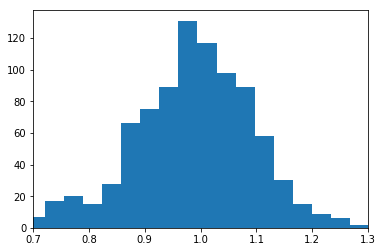

NormaltestResult(statistic=40.23699097792025, pvalue=1.830831706414855e-09)

In [265]:
plt.hist(green_data['Excess Readmission Ratio'],bins=30)
plt.xlim(xmin=0.7, xmax = 1.3)
plt.show()
stats.normaltest(green_data['Excess Readmission Ratio'])

<p>Neither distribution looks normal given their p-values. The bootstrap looks like a good canidate to find a distribution for the differences in means of the two distributions.</p>

In [266]:
data=clean_hospital_read_df[np.array(clean_hospital_read_df['Number of Discharges']<2500)]
data=data[np.isfinite(data['Excess Readmission Ratio']) & np.isfinite(data['Number of Discharges'])]

In [269]:
trials=10**4
mean_diff=np.empty(trials)
for trial in tqdm_notebook(range(trials)):
    data_1=data['Excess Readmission Ratio'].sample(green_data.size,replace=True)
    data_2=data['Excess Readmission Ratio'].sample(red_data.size,replace=True)
    mean_diff[trial]=np.mean(data_1)-np.mean(data_2)
p=np.sum(mean_diff<=(np.mean(green_data['Excess Readmission Ratio'])-np.mean(red_data['Excess Readmission Ratio'])))/trials
confidence_interval=list(np.percentile(mean_diff,[0.5,99.5]))
print(' p-value: ',p,'\r\n','Confidence Interval: ',confidence_interval)

 p-value:  0.0 
 Confidence Interval:  [-0.0023899440171479634, 0.00237729848634787]


In [162]:
np.mean(green_data['Excess Readmission Ratio'])-np.mean(red_data['Excess Readmission Ratio'])

-0.028279972857422675

<p>Given the p-value the means the red region and the green region are not samples from the same set of data.</p>

<p><b>3. Report statistical significance for  $\alpha  = .01$.</b></p>

In [270]:
print('Confidence Interval: ',confidence_interval)

Confidence Interval:  [-0.0023899440171479634, 0.00237729848634787]


<p><b>4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</b></p>

<p>The bootstrap method showed two random samples with the sizes of the samples in the measurement never differed more than the amount of the measured in the experiment. This difference is still small enough to show no difference in quailty of care however trying to correct for this effect will most likely effect the quailty of care.</p>

<p><b>5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
    - Construct another plot that conveys the same information in a more direct manner.</b></p>

<p>The graph uses a great method to seperate categorical data. The graph seperates the two regions by color and this conveys a bifurcation without explaination. <br><br>Ultimately the graph misleads the reader about the true nature of the data. The location of the regions on the y-axis conveys a false measurement of a difference in the means of the distributions. The outliers in the red region appear as part of the data distribution due to the inability to determine the density of the data points in the red region.</p>

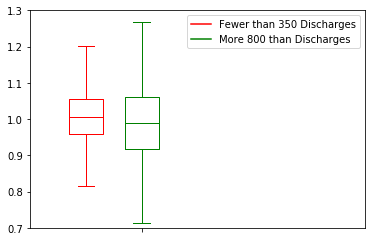

In [248]:
def setBoxColors(bp, temp_color):
    plt.setp(bp['boxes'][0], color=temp_color)
    plt.setp(bp['caps'][0], color=temp_color)
    plt.setp(bp['caps'][1], color=temp_color)
    plt.setp(bp['whiskers'][0], color=temp_color)
    plt.setp(bp['whiskers'][1], color=temp_color)
    plt.setp(bp['medians'][0], color=temp_color)

# Some fake data to plot
A= red_data
B = green_data

fig = plt.figure()
ax = plt.axes()
#plt.hold(True)

# first boxplot pair
bp = plt.boxplot(A, positions = [1], widths = 0.6, showfliers=False)
setBoxColors(bp,'red')

# second boxplot pair
bp = plt.boxplot(B, positions = [2], widths = 0.6, showfliers=False)
setBoxColors(bp,'green')

# set axes limits and labels
plt.xlim(0,6)
plt.ylim(0.7,1.3)
ax.set_xticklabels([])

# draw temporary red and blue lines and use them to create a legend
hB, = plt.plot([1,1],'r-')
hR, = plt.plot([1,1],'g-')
plt.legend((hB, hR),('Fewer than 350 Discharges', 'More 800 than Discharges'))
hB.set_visible(False)
hR.set_visible(False)

plt.show()

<h1>Appendix</h1>

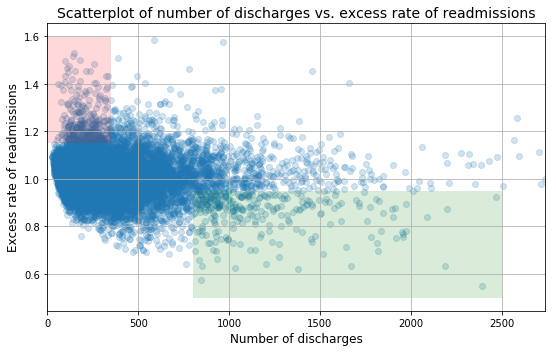

In [249]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in data['Number of Discharges']]
y = list(data['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 1.6, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [250]:
stats.normaltest(y)

NormaltestResult(statistic=1094.212403734513, pvalue=2.4819642062042298e-238)

In [251]:
coef=np.polyfit(x,y,1)
y_corrected=np.array(y)-coef[0]*np.array(x)-coef[1]

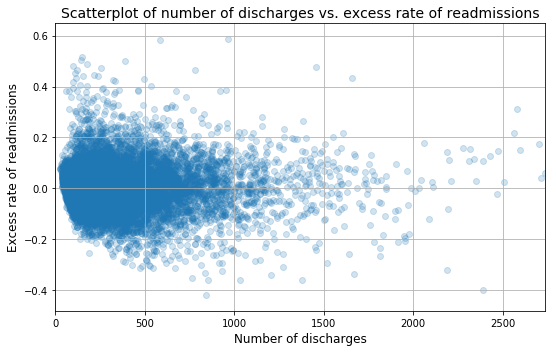

In [252]:
x = [a for a in data['Number of Discharges']]
y_corrected = list(y_corrected)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y_corrected,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

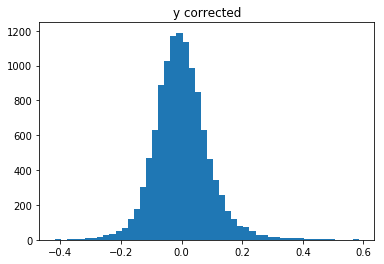

Power_divergenceResult(statistic=8.853695237153906e+16, pvalue=0.0)


In [253]:
plt.hist(y_corrected,bins=50)
plt.title('y corrected')
plt.show()
print(stats.chisquare(y_corrected))

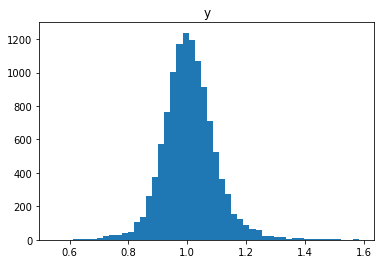

Power_divergenceResult(statistic=95.01881429012303, pvalue=1.0)


In [254]:
plt.hist(y,bins=50)
plt.title('y')
plt.show()
print(stats.chisquare(y))